In [1]:
from langgraph.graph import StateGraph,START,END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

model= ChatGroq(
model="llama-3.3-70b-versatile",
temperature=0.5
)


In [14]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str


def generate_joke(state: JokeState):
    prompt=f"Generate a joke about the topic {state['topic']}"
    joke=model.invoke(prompt).content
    return {"joke": joke}

def explain_joke(state: JokeState):
    prompt=f"Explain the joke about the topic {state['topic']}: {state['joke']}"
    explanation=model.invoke(prompt).content
    return {"explanation": explanation}

In [ ]:
graph=StateGraph(JokeState)
checkpoint=InMemorySaver()

graph.add_node("generate_joke", generate_joke)
graph.add_node("explain_joke", explain_joke)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

workflow=graph.compile(checkpointer=checkpoint)

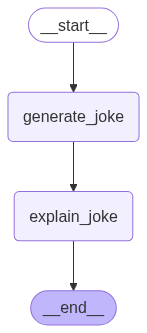

In [16]:
workflow

In [17]:
config1={
    "configurable":{"thread_id":"1"}
}

workflow.invoke({"topic":"chickens crossing the road"},config=config1)

{'topic': 'chickens crossing the road',
 'joke': 'Why did the chicken cross the road?\n\nTo get away from the farmer\'s constant "egg-pectations"! (get it?)',
 'explanation': 'A classic play on words. The joke is funny because it\'s a pun on the phrase "expectations" and "egg-pectations." The word "egg" is a clever substitution because chickens are known for laying eggs, so it\'s a clever connection to make.\n\nThe joke is saying that the chicken crossed the road to escape the farmer\'s high "egg-pectations," implying that the farmer is putting pressure on the chicken to produce a lot of eggs. It\'s a lighthearted and humorous way to poke fun at the idea of chickens being under pressure to perform.\n\nThe use of wordplay like this creates a sense of surprise and delight, which is what makes the joke amusing. It\'s a clever and creative way to subvert the usual expectation of a straightforward answer to the question "Why did the chicken cross the road?" and instead offers a humorous and

In [18]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'chickens crossing the road', 'joke': 'Why did the chicken cross the road?\n\nTo get away from the farmer\'s constant "egg-pectations"! (get it?)', 'explanation': 'A classic play on words. The joke is funny because it\'s a pun on the phrase "expectations" and "egg-pectations." The word "egg" is a clever substitution because chickens are known for laying eggs, so it\'s a clever connection to make.\n\nThe joke is saying that the chicken crossed the road to escape the farmer\'s high "egg-pectations," implying that the farmer is putting pressure on the chicken to produce a lot of eggs. It\'s a lighthearted and humorous way to poke fun at the idea of chickens being under pressure to perform.\n\nThe use of wordplay like this creates a sense of surprise and delight, which is what makes the joke amusing. It\'s a clever and creative way to subvert the usual expectation of a straightforward answer to the question "Why did the chicken cross the road?" and instead of

In [19]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'chickens crossing the road', 'joke': 'Why did the chicken cross the road?\n\nTo get away from the farmer\'s constant "egg-pectations"! (get it?)', 'explanation': 'A classic play on words. The joke is funny because it\'s a pun on the phrase "expectations" and "egg-pectations." The word "egg" is a clever substitution because chickens are known for laying eggs, so it\'s a clever connection to make.\n\nThe joke is saying that the chicken crossed the road to escape the farmer\'s high "egg-pectations," implying that the farmer is putting pressure on the chicken to produce a lot of eggs. It\'s a lighthearted and humorous way to poke fun at the idea of chickens being under pressure to perform.\n\nThe use of wordplay like this creates a sense of surprise and delight, which is what makes the joke amusing. It\'s a clever and creative way to subvert the usual expectation of a straightforward answer to the question "Why did the chicken cross the road?" and instead o